<a href="https://colab.research.google.com/github/komalbarge45/NaturalLanguageProcessing/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Assignment 1**
Nonlinear regression with Deep Learning

In [1]:
# Pandas library: To read the dataset
import pandas as pd
# Read the dataset 'housing.csv'
dataset = pd.read_csv('/content/housing.csv')
# Print first 10 records with the help head(n) function
tenRecords = dataset.head(10)
print('The first 10 records of the dataset:')
tenRecords

The first 10 records of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Plotting of dataset features

                     Housing Dataset


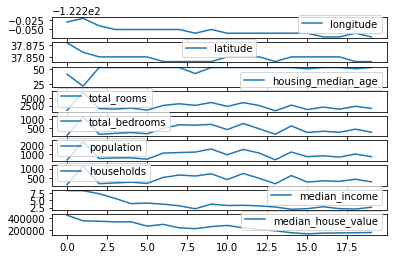

In [2]:
import matplotlib.pyplot as plt
columns = dataset.columns.drop(['ocean_proximity'])
datasetForGraph = dataset.head(20)
fig, ax = plt.subplots(nrows=9, ncols=1)
x_data = range(0,datasetForGraph.shape[0])
i=0
# Plot the feature subplots for given housing dataset
# Each feature will be having a seperate subplot
print('                     Housing Dataset')
for column in columns:
  ax[i].plot(x_data, datasetForGraph[column], label=column)
  ax[i].legend()
  i = i + 1

Nonlinear regression model

In [0]:
#Remove any incomplete entries
dataset=dataset.dropna()

In [0]:
#We will predict the "median_house_value" column
Y = dataset['median_house_value']

X=dataset.loc[:,'longitude':'median_income']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3)

#Converts the datasets to numpy arrays to work with PyTorch model
x_train_np=x_train.to_numpy()
y_train_np=y_train.to_numpy()
#Convert the testing data
x_test_np=x_test.to_numpy()
y_test_np=y_test.to_numpy()


In [6]:
import torch
#1D convolutional layer, we are inputting 1-dimensional row of data, we cant use 2d or 3d
from torch.nn import Conv1d
#max pooling layer
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu
from torch.nn import BatchNorm1d

#dataloader is for taking the dataset from tensordataset and input it in minibatchsizes
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from torch.nn import L1Loss

!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

     |████████████████████████████████| 112kB 8.6MB/s 


In [0]:
#define the model
class CnnRegressor(torch.nn.Module):

  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs

    #define the input layer
    self.input_layer = Conv1d(inputs, batch_size, 1)
    self.batchNorm = BatchNorm1d(batch_size)

    #kernel size = 1
    self.max_pooling_layer = MaxPool1d(1)

    #output channels = 128, kernel size = 1
    self.conv_layer = Conv1d(batch_size, 128, 1)
    self.batchNorm1 = BatchNorm1d(128)
    self.max_pooling_layer1 = MaxPool1d(1)
    self.conv_layer1 = Conv1d(128, 128, 1)
    self.batchNorm2 = BatchNorm1d(128)
    self.max_pooling_layer2 = MaxPool1d(1)
    self.conv_layer2 = Conv1d(128, 128, 1)
    self.batchNorm3 = BatchNorm1d(128)
    self.max_pooling_layer3 = MaxPool1d(1)
    self.conv_layer3 = Conv1d(128, 128, 1)
    self.batchNorm4 = BatchNorm1d(128)
    self.max_pooling_layer4 = MaxPool1d(1)
    self.conv_layer4 = Conv1d(128, 128, 1)
    self.batchNorm5 = BatchNorm1d(128)
    self.max_pooling_layer5 = MaxPool1d(1)

    #it becomes single FC regular NN after flattening
    self.flatten_layer = Flatten()

    #input channels = 128, output  = 64
    
    self.linear_layer1 = Linear(128,64)
    self.linear_layer2 = Linear(64,32)
    self.linear_layer3 = Linear(32,32)

    self.output_layer = Linear(32, outputs)

  # a method to feed inputs through the model
  def feed(self, input):
    #reshape is converting the 2D inputs to 3D model as it expects
    #3D array to prcoess in 1D fashion
    input = input.reshape((self.batch_size, self.inputs, 1))

    output = self.input_layer(input)
    output = relu(self.batchNorm(output))

    output = self.max_pooling_layer(output)

    #to remove nonlinearity from the function, we are using relu functions
    # we can use relu as many times as we want
    output = self.max_pooling_layer1(relu(self.batchNorm1(self.conv_layer(output))))
    output = self.max_pooling_layer2(relu(self.batchNorm2(self.conv_layer1(output))))
    output = self.max_pooling_layer3(relu(self.batchNorm3(self.conv_layer2(output))))
    output = self.max_pooling_layer4(relu(self.batchNorm4(self.conv_layer3(output))))
    output = self.max_pooling_layer5(relu(self.batchNorm5(self.conv_layer4(output))))

    output = self.flatten_layer(output)

    output = self.linear_layer1(output)
    output = self.linear_layer2(output)
    output = self.linear_layer3(output)
    
    output = self.output_layer(output)
    return output

In [8]:
#define the model
batch_size = 128
#batch size, inputs and outputs
model = CnnRegressor(batch_size, X.shape[1], 1)
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 128, kernel_size=(1,), stride=(1,))
  (batchNorm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
  (batchNorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pooling_layer1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer1): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
  (batchNorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pooling_layer2): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
  (batchNorm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pooling_layer3): MaxPool1d(kernel_size=

In [0]:
# this method will return the average L1 loss and R2 score
def model_loss(model, dataset, train = False, optimizer = None):
  #cycle through the batches and get avg L1 loss
  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0
  for input, output in iter(dataset):
    #model's predictoins for the training dataset
    predictions = model.feed(input)

    #model's loss
    loss = performance(predictions, output)

    #get the model's R2 score
    score_metric.update([predictions, output])
    score = score_metric.compute()

    if(train):
      #clear errors so that they dont accumulate
      optimizer.zero_grad()
      #compute gradients for our optimizer
      loss.backward()
      #use optimizer to update the model's parameters based on the gradients
      optimizer.step()

    #store the loss and update the counter
    avg_loss += loss.item()
    avg_score += score
    count += 1
  return avg_loss / count, avg_score / count

In [10]:
#lets train the model
epochs = 300

optimizer = Adam(model.parameters(), lr=0.001)
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

#create a dataloader instance to work with our batches
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

for epoch in range(epochs):
  avg_loss, avg_r2_score = model_loss(model, loader, train=True, optimizer=optimizer)

  print("Epoch " + str(epoch+1) + ":\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " + str(avg_r2_score))


Epoch 1:
	Loss = 205719.27815315317
	R^2 Score = -3.1900611505376575
Epoch 2:
	Loss = 137024.23571227476
	R^2 Score = -2.240038025241585
Epoch 3:
	Loss = 76438.2679124437
	R^2 Score = 0.21138087269084652
Epoch 4:
	Loss = 70250.65181587837
	R^2 Score = 0.3423280848421708
Epoch 5:
	Loss = 67614.71846846846
	R^2 Score = 0.3967275314144908
Epoch 6:
	Loss = 65077.04363738739
	R^2 Score = 0.41965324920591585
Epoch 7:
	Loss = 62657.879504504504
	R^2 Score = 0.464734451493825
Epoch 8:
	Loss = 59520.22466216216
	R^2 Score = 0.5064592966691548
Epoch 9:
	Loss = 54668.70882601351
	R^2 Score = 0.5748064635641439
Epoch 10:
	Loss = 51777.17451435811
	R^2 Score = 0.5950821119989469
Epoch 11:
	Loss = 50370.50918496621
	R^2 Score = 0.6261383236022918
Epoch 12:
	Loss = 50177.075872747744
	R^2 Score = 0.6414769265415429
Epoch 13:
	Loss = 48534.84304617117
	R^2 Score = 0.6562811804391877
Epoch 14:
	Loss = 47691.96308417793
	R^2 Score = 0.6615640557826326
Epoch 15:
	Loss = 47168.895411036036
	R^2 Score = 0.

In [21]:
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()

#create a dataloader instance to work with our batches
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

avg_loss, avg_r2_score = model_loss(model, loader)
print("The model's L1loss is:" + str(avg_loss))
print("The model's R^2score is:" + str(avg_r2_score))

The model's L1loss is:35493.50049867021
The model's R^2score is:0.7702273103337192
